### Dijkstra's Algorithm

In [1]:
import graphviz as gv
import numpy as np
import pandas as pd

def adjmShow(M, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(M)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  for u in range(n):
    for v in range(0 if directed else u, n):
      if weighted:
        if not np.isnan(M[u, v]):
          g.edge(str(u), str(v), f"{M[u, v]:.0f}")
      else:
        if M[u, v] == 1:
          g.edge(str(u), str(v))
  return g
def adjlShow(L, labels=None, directed=False, weighted=False, layout="neato"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.node_attr["style"] = "filled"
  g.node_attr["color"] = "orange"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

In [2]:
%%file dijkstra.txt
1|3 2|5 3|4
0|3 2|6 5|2 6|1
0|5 1|6 4|5 6|9
0|4 7|8
2|5 6|4
1|2
1|1 2|9 4|4
3|8 6|8

Overwriting dijkstra.txt


[None, 0, 0, 0, 6, 1, 1, 3]
[0, 3, 5, 4, 8, 5, 4, 12]


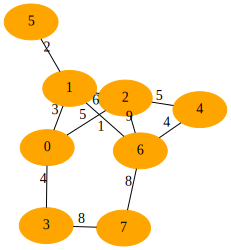

In [3]:
import Heap as hp

def Dijkstra(graph,start):
    n = len(graph)
    visited = [False]*n
    path = [None]*n
    cost = [float('inf')]*n
    cost[start] = 0
    # Priority Queue
    pq = hp.Heap(lambda a, b: a[0] < b[0])
    pq.push((0,start))
    while pq.Size() > 0:
        c , v = pq.pop()
        if not visited[v]:
            visited[v] = True
            for u, w in graph[v]:
                if not visited[u]:
                    if c + w < cost[u]:
                        cost[u] = c + w
                        path[u] = v
                        pq.push((cost[u],u))
    return path, cost
graph, _ = readAdjl("dijkstra.txt",weighted=True)
path, cost = Dijkstra(graph,0)
print(path)
print(cost)
adjlShow(graph,weighted=True)

### Ejercicio Dijkstra

In [4]:
%%file ejDijkstra.txt
2
1
1 2 999
3
3
1 3 10
2 1 20
3 2 50
9
12
1 2 10
1 3 10
1 4 10
2 5 10
3 5 10
4 5 10
5 7 10
6 7 10
7 8 10
6 9 10
7 9 10
8 9 10
0

Overwriting ejDijkstra.txt


In [5]:
import Heap as hp


def Dijkstra(graph,start,end): # Complejidad O((|V|+|E|)log(|V|))  = Complejidad BFS * Log(|V|) por la cola de prioridad
    n = len(graph)
    visited = [False]*n
    path = [None]*n
    cost = [float('inf')]*n
    cost[start] = 0
    # Priority Queue
    pq = hp.Heap(lambda a, b: a[0] < b[0])
    pq.push((0,start))
    while pq.Size() > 0:
        c , v = pq.pop()
        if not visited[v]:
            visited[v] = True
            if v == end:
                break
            for u, w in graph[v]:
                if not visited[u]:
                    if c + w < cost[u]:
                        cost[u] = c + w
                        path[u] = v
                        pq.push((cost[u],u))
    return path, cost

def solution(graph,start,end):
    path, cost = Dijkstra(graph,start,end)
    if path[end] == None:
        return "Back To Jail"
    v = end
    while path[v] != None:
        parent = path[v]
        for i in range(len(graph[v])):
            u, w = graph[v][i]
            if u == parent:
                graph[v].remove((u,w))
                break
        for i in range(len(graph[parent])):
            u, w = graph[parent][i]
            if u == v:
                graph[parent].remove((u,w))
                break
        v = path[v]
    path2, cost2 = Dijkstra(graph,start,end)
    if path2[end] == None:
        return "Back To Jail"
    return str(cost[end] + cost2[end])

with open("ejDijkstra.txt") as file:
    while True:
        n = int(file.readline())
        if n == 0:
            break
        e = int(file.readline())
        graph = [[] for _ in range(n)]
        for _ in range(e):
            v, u, w = map(int,file.readline().strip().split())
            graph[v-1].append((u-1,w))
            graph[u-1].append((v-1,w))
        print(solution(graph,0,n-1))

Back To Jail
80
Back To Jail


##### Solution 2

In [ ]:
class Solution:  
    def __init__(self,n)->None:
        self.path=[None]*n;
        
    def twiceways(self,graph,start):
        n=len(graph)
        path1,costos1=self.Dijkstra(graph,start)
        print(self.path)
        path2,costos2=self.Dijkstra(graph,start)
        costototal2=costos2[n-1]
        costototal1=costos1[n-1]
        if costototal2==float('inf'):
            print("Back to jail\n")
        else:
            print(costototal2+costototal1,'\n')
           
    def Dijkstra(self,graph,start):
        n=len(graph);
        visited=[False]*n
        path=[None]*n
        cost=[float('inf')]*n
        cost[start]=0;
        #Priority Queue
        pq=hp.Heap(lambda a,b: a[0]<b[0]);
        pq.push((0,start));
        while pq.Size()>0:
            c , v = pq.pop();
            if not visited[v]:
                visited[v]=True
                for u,w in graph[v]:
                    if ((not visited[u]) and (self.path[u]!=v)):
                        if c+w<cost[u]:
                            cost[u]=c+w
                            path[u]=v
                            pq.push((cost[u],u));
        self.path = [None]*n
        hijo = n-1
        padre = path[n-1]
        while padre!=None:
            self.path[hijo]=padre
            padre=path[padre]
            hijo-=1
        return path,cost

graph,_= readAdjl("ejDijkstra.txt",weighted=True)
for i, edges in enumerate(graph):
      print(f"{i:2}: {edges}")
solution3= Solution(len(graph))
solution3.twiceways(graph,0)
adjlShow(graph,weighted=True)